## Tim en Jelle's notebook voor PCA
Welkom

In [21]:
# just a personal script to change the directory to the right one
import os
os.chdir(r'C:\Users\20223192\OneDrive - TU Eindhoven\Documents\Advanced programming\8CC00-groep-9')
# current directory
print(os.getcwd())

C:\Users\20223192\OneDrive - TU Eindhoven\Documents\Advanced programming\8CC00-groep-9


In [22]:
# imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# load data from csv
data = pd.read_csv('tested_molecules_with_descriptors.csv')
data.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,0,0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Separate the molecular descriptors from the inhibition labels and SMILES
df_descriptors = data[['PKM2_inhibition', 'ERK2_inhibition', 'SMILES']]
df_data= data.drop(columns=['PKM2_inhibition', 'ERK2_inhibition', 'SMILES'])
df_descriptors.head()

,PKM2_inhibition,ERK2_inhibition,SMILES
0,0,0,C=C(C)c1nc(N)nc(N)n1
1,0,0,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1
2,0,0,C=CCNC(=O)CCCC(=O)NCC=C
3,0,0,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21
4,0,0,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O


In [28]:
# Identify columns with zero variance (have no discriminatory information)
zero_variance_columns = df_data.columns[df_data.nunique() <= 1]

# Print or remove these columns
print("Columns with zero variance:", zero_variance_columns)
df_data = df_data.drop(columns=zero_variance_columns)

Columns with zero variance: Index(['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'EState_VSA11',
       'fr_HOCCN', 'fr_SH', 'fr_aldehyde', 'fr_azide', 'fr_azo',
       'fr_benzodiazepine', 'fr_diazo', 'fr_epoxide', 'fr_hdrzine',
       'fr_hdrzone', 'fr_isocyan', 'fr_isothiocyan', 'fr_nitro_arom_nonortho',
       'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd',
       'fr_term_acetylene', 'fr_thiocyan'],
      dtype='object')


In [32]:
# check if descriptors are normally distributed 
from scipy.stats import shapiro

# Initialize a counter for normally distributed columns
num_norm_columns = 0
alpha = 0.05
# Iterate over each column in df_data
for column in df_data.columns:
    # Perform Shapiro-Wilk test for normality
    stat, p = shapiro(df_data[column])
    
    # Check if the p-value is greater than the significance level (alpha)
    if p > alpha:
        num_norm_columns += 1

# Calculate the percentage of normally distributed columns
percentage_norm_columns = (num_norm_columns / len(df_data.columns)) * 100

percentage_norm_columns

0.0

In [26]:
# data is not normally distributed, so we need to scale it, we will use MinMaxScaler
# # Standardize the features by scaling them to have mean 0 and variance 1
# scalerstandard = StandardScaler()
# df_scaled = scalerstandard.fit_transform(df_data)

(array([[4.000e+00, 1.000e+01, 1.800e+01, ..., 1.100e+02, 2.400e+01,
         6.000e+00],
        [4.000e+00, 1.000e+01, 1.800e+01, ..., 1.100e+02, 2.400e+01,
         6.000e+00],
        [3.370e+02, 2.490e+02, 1.720e+02, ..., 2.000e+00, 3.000e+00,
         1.000e+00],
        ...,
        [1.033e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         3.000e+00],
        [1.038e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         5.000e+00],
        [1.059e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         1.000e+00]]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 187 BarContainer objects>)

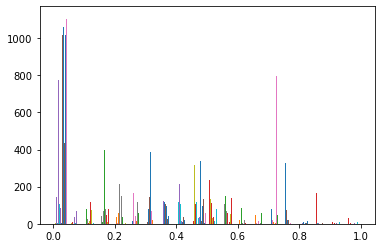

In [34]:
scalerminmax = MinMaxScaler()
df_scaled = scalerminmax.fit_transform(df_data)

In [36]:
# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

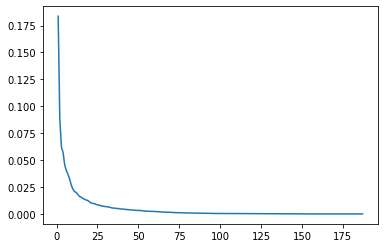

In [37]:
# explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# visualize explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)

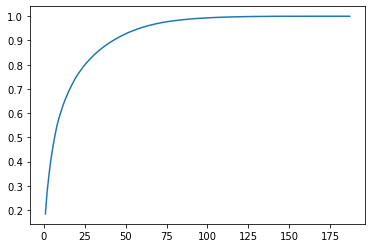

In [40]:
# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
# visualize cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)


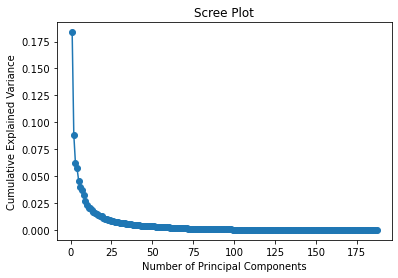

In [43]:


# Create the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()
# elbow around 10 components

In [39]:
# keep 90% of the variance
num_components = (cumulative_explained_variance < 0.9).sum() + 1
print("Number of components that explain 90% of the variance:", num_components)
# Apply PCA with the number of components that explain 90% of the variance
pca = PCA(n_components=num_components)
df_pca = pca.fit_transform(df_scaled)

Number of components that explain 90% of the variance: 43
